### 绘制logistc回归图像

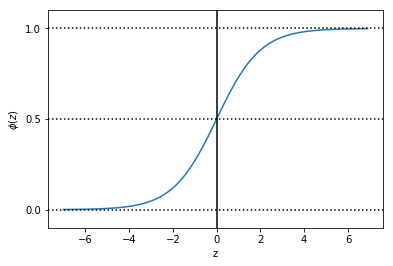

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
# 绘制垂直线
plt.axvline(0.0, color="k")

plt.axhspan(0.0, 1.0, facecolor="1.0", alpha=1.0, ls="dotted")
# 绘制参考线
plt.axhline(y=0.5, ls="dotted", color="k")
plt.axhline(y=0.0, ls="dotted", color="k")
plt.axhline(y=1.0, ls="dotted", color="k")
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel("$\phi (z)$")
plt.show()

### 代价函数
$$J(w) = \sum_{i=1}^{n}-\log(\phi(z^{(i)})) - (1-y^{(i)})\log(1-\phi(z^{(i)}))$$

### 训练模型

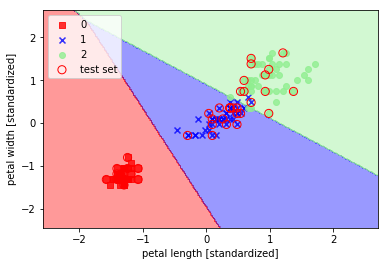

In [12]:
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from util import plot_decision_regions

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.show()